In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("/content/Questionaries' for pre-diagnose diabetes (Responses) - Form Responses 1.csv")
data.head()

,Timestamp,Age,Gender,Height,Weight,Smoking,High Blood Pressure,Parental Diabetes Mellitus,Polyuria,Polydipsia,Polyphagia,Sudden weight loss,Weakness,Delayed Healing,Blurred vision,Itching,Irritability,Partial paresis,Muscle stiffness Muscle,Alopecia,Diabetes
0,3/23/2021 12:00,Yes,Female,"5'3""",61,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
1,3/23/2021 13:14,27,Female,160 cm,74,No,No,Yes,No,No,No,No,No,No,No,Yes,Yes,No,No,No,No
2,3/23/2021 23:07,55,Male,5.5,65,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,Yes,No,Yes,Yes,No,No,Yes
3,3/23/2021 23:08,54,Female,5.2,52,No,No,Yes,Yes,No,Yes,No,Yes,No,Yes,No,No,No,Yes,No,Yes
4,3/23/2021 23:09,69,Male,5.5,62,No,Yes,Yes,No,No,No,No,No,Yes,No,Yes,Yes,No,No,No,Yes


##**Data Cleaning**

In [ ]:
data.drop(['Timestamp', 'Height'], axis = 1, inplace = True)

In [ ]:
data.head()

,Age,Gender,Weight,Smoking,High Blood Pressure,Parental Diabetes Mellitus,Polyuria,Polydipsia,Polyphagia,Sudden weight loss,Weakness,Delayed Healing,Blurred vision,Itching,Irritability,Partial paresis,Muscle stiffness Muscle,Alopecia,Diabetes
0,Yes,Female,61,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
1,27,Female,74,No,No,Yes,No,No,No,No,No,No,No,Yes,Yes,No,No,No,No
2,55,Male,65,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,Yes,No,Yes,Yes,No,No,Yes
3,54,Female,52,No,No,Yes,Yes,No,Yes,No,Yes,No,Yes,No,No,No,Yes,No,Yes
4,69,Male,62,No,Yes,Yes,No,No,No,No,No,Yes,No,Yes,Yes,No,No,No,Yes


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558 entries, 0 to 557
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Age                         558 non-null    object
 1   Gender                      558 non-null    object
 2   Weight                      558 non-null    object
 3   Smoking                     553 non-null    object
 4   High Blood Pressure         558 non-null    object
 5   Parental Diabetes Mellitus  558 non-null    object
 6   Polyuria                    558 non-null    object
 7   Polydipsia                  558 non-null    object
 8   Polyphagia                  558 non-null    object
 9   Sudden weight loss          558 non-null    object
 10  Weakness                    558 non-null    object
 11  Delayed Healing             558 non-null    object
 12  Blurred vision              558 non-null    object
 13  Itching                     558 non-null    object

Here we can see that 'Age' and 'Weight' columns are of object type. So, we have to convert them to numeric type. More specifically to float64

In [ ]:
data.isnull().sum()

Age                           0
Gender                        0
Weight                        0
Smoking                       5
High Blood Pressure           0
Parental Diabetes Mellitus    0
Polyuria                      0
Polydipsia                    0
Polyphagia                    0
Sudden weight loss            0
Weakness                      0
Delayed Healing               0
Blurred vision                0
Itching                       0
Irritability                  0
Partial paresis               0
Muscle stiffness Muscle       0
Alopecia                      0
Diabetes                      0
dtype: int64

From the above we can see there are 5 missing values in the 'Smoking' column.

In [ ]:
data['Smoking'].value_counts()

No     471
Yes     82
Name: Smoking, dtype: int64

Because most of the values of the column 'Smoking' is 'No' so we will try to replace the 5 missing values with 'No' 

###Replacing Missing Values

In [ ]:
smoking = data.Smoking

In [ ]:
data.shape

(558, 19)

In [ ]:
for i in range(data.shape[0]):
  if isinstance(data.loc[i, 'Smoking'], float):
    print(i)

266
364
366
494
505


In [ ]:
data.loc[[266,364,366,494,505],['Smoking']]

,Smoking
266,NaN
364,NaN
366,NaN
494,NaN
505,NaN


In [ ]:
for i in range(data.shape[0]):
  if isinstance(data.loc[i, 'Smoking'], float):
    data.loc[i, 'Smoking'] = 'No'

In [ ]:
data.isnull().sum()

Age                           0
Gender                        0
Weight                        0
Smoking                       0
High Blood Pressure           0
Parental Diabetes Mellitus    0
Polyuria                      0
Polydipsia                    0
Polyphagia                    0
Sudden weight loss            0
Weakness                      0
Delayed Healing               0
Blurred vision                0
Itching                       0
Irritability                  0
Partial paresis               0
Muscle stiffness Muscle       0
Alopecia                      0
Diabetes                      0
dtype: int64

In [ ]:
data['Age'][1:] = data['Age'][1:].astype(np.float64)

In [ ]:
data['Age'][1:].mean()

38.06014362657091

In [ ]:
data['Age'][0] = data['Age'][1:].mean() 

####**Cleaning coulumn 'Weight'**

In [ ]:
import re

for i in range(data.shape[0]):
  match = re.findall(r'\d*',data['Weight'][i])
  if match[0] == '':
    data['Weight'][i] = str(0)
  else:
    data['Weight'][i] = match[0]

In [ ]:
data.head()

,Age,Gender,Weight,Smoking,High Blood Pressure,Parental Diabetes Mellitus,Polyuria,Polydipsia,Polyphagia,Sudden weight loss,Weakness,Delayed Healing,Blurred vision,Itching,Irritability,Partial paresis,Muscle stiffness Muscle,Alopecia,Diabetes
0,38.0601,Female,61,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
1,27,Female,74,No,No,Yes,No,No,No,No,No,No,No,Yes,Yes,No,No,No,No
2,55,Male,65,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,Yes,No,Yes,Yes,No,No,Yes
3,54,Female,52,No,No,Yes,Yes,No,Yes,No,Yes,No,Yes,No,No,No,Yes,No,Yes
4,69,Male,62,No,Yes,Yes,No,No,No,No,No,Yes,No,Yes,Yes,No,No,No,Yes


In [ ]:
# Converting 'Age' and 'Weight' to numpy float
data['Age'] = data['Age'].astype(np.float64)
data['Weight'] = data['Weight'].astype(np.float64)

In [ ]:
data.dtypes

Age                           float64
Gender                         object
Weight                        float64
Smoking                        object
High Blood Pressure            object
Parental Diabetes Mellitus     object
Polyuria                       object
Polydipsia                     object
Polyphagia                     object
Sudden weight loss             object
Weakness                       object
Delayed Healing                object
Blurred vision                 object
Itching                        object
Irritability                   object
Partial paresis                object
Muscle stiffness Muscle        object
Alopecia                       object
Diabetes                       object
dtype: object

In [ ]:
data['Weight'].mean()
   

65.51075268817205

In [ ]:
for i in range(data.shape[0]):
  if data['Weight'][i] == 0:
    print(i)
    data['Weight'][i] == data['Weight'].mean()
 

17


##**Exploratory Data Analysis**

In [ ]:
columns = data.columns

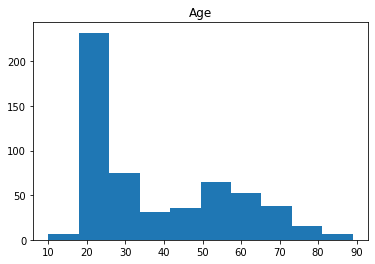

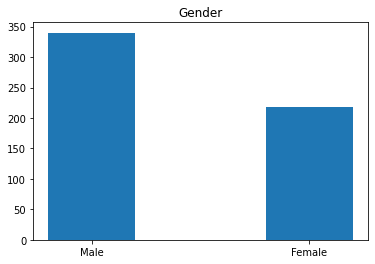

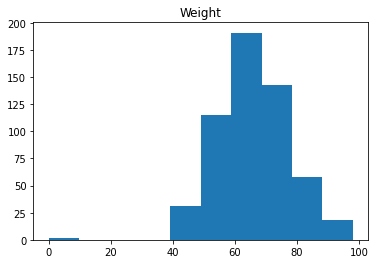

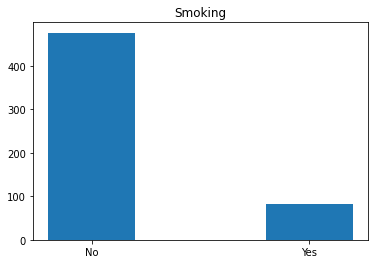

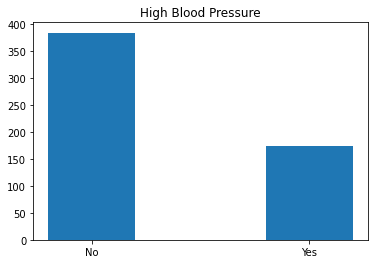

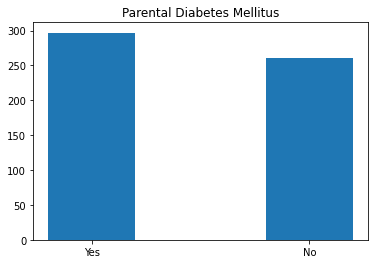

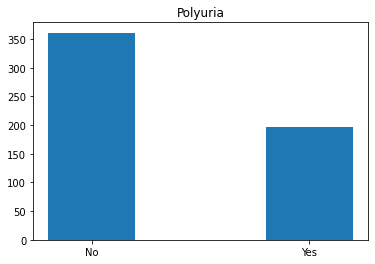

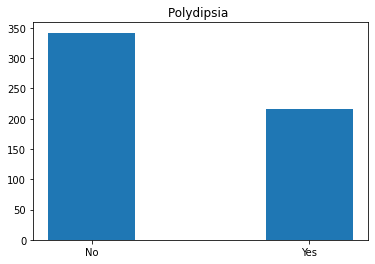

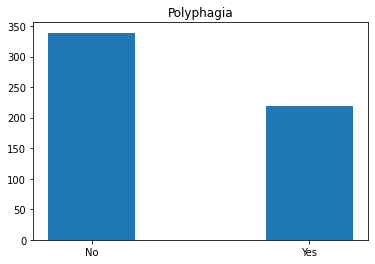

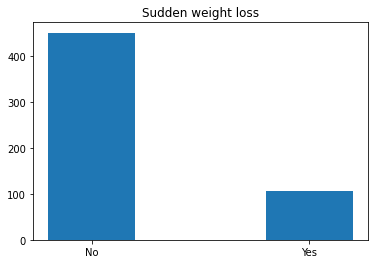

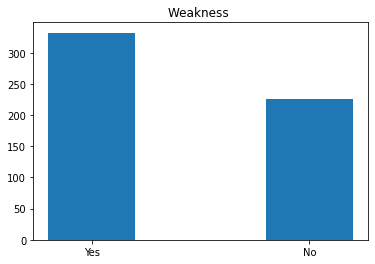

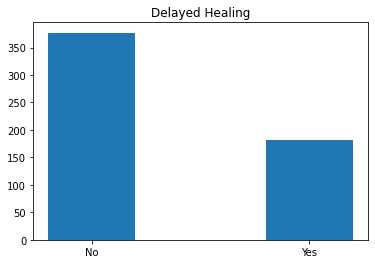

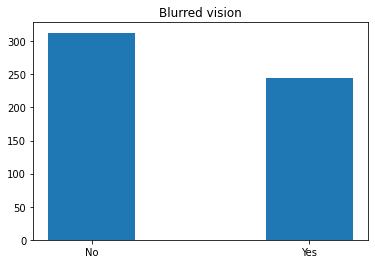

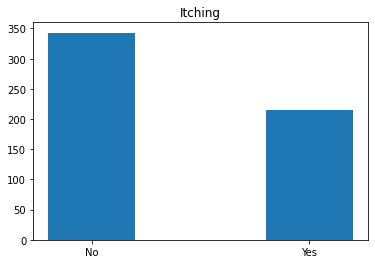

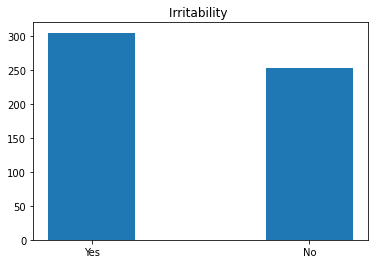

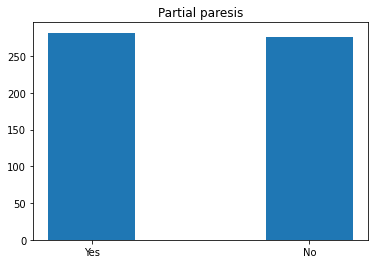

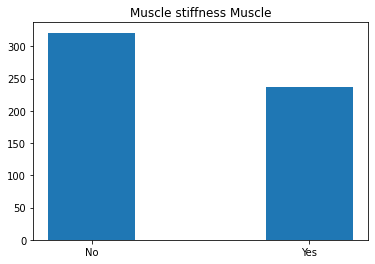

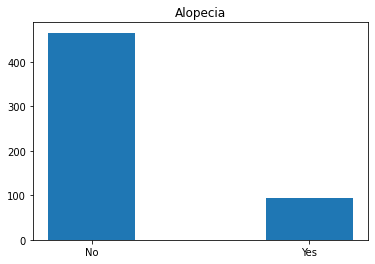

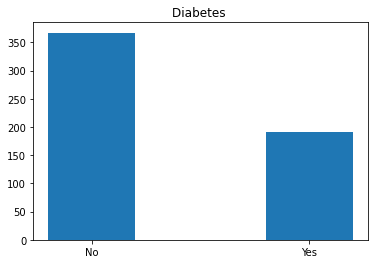

In [ ]:
for i in columns:
  if data[i].dtypes == 'O':
    X = data[i].value_counts()
    plt.figure()
    plt.bar(X.index,X.values, width= 0.4)
    plt.title(i)
  else:
    plt.figure()
    plt.hist(data[i], bins = 10)
    plt.title(i)

##**Encoding Categorical features**

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for column in columns:
  if data[column].dtypes == 'O':
    data[column] = le.fit_transform(data[column])

In [ ]:
data.head()

,Age,Gender,Weight,Smoking,High Blood Pressure,Parental Diabetes Mellitus,Polyuria,Polydipsia,Polyphagia,Sudden weight loss,Weakness,Delayed Healing,Blurred vision,Itching,Irritability,Partial paresis,Muscle stiffness Muscle,Alopecia,Diabetes
0,38.060144,0,61.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,27.000000,0,74.0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0
2,55.000000,1,65.0,1,1,1,1,0,1,1,1,0,1,0,1,1,0,0,1
3,54.000000,0,52.0,0,0,1,1,0,1,0,1,0,1,0,0,0,1,0,1
4,69.000000,1,62.0,0,1,1,0,0,0,0,0,1,0,1,1,0,0,0,1


##**Correlation Analysis**

<Figure size 432x288 with 0 Axes>

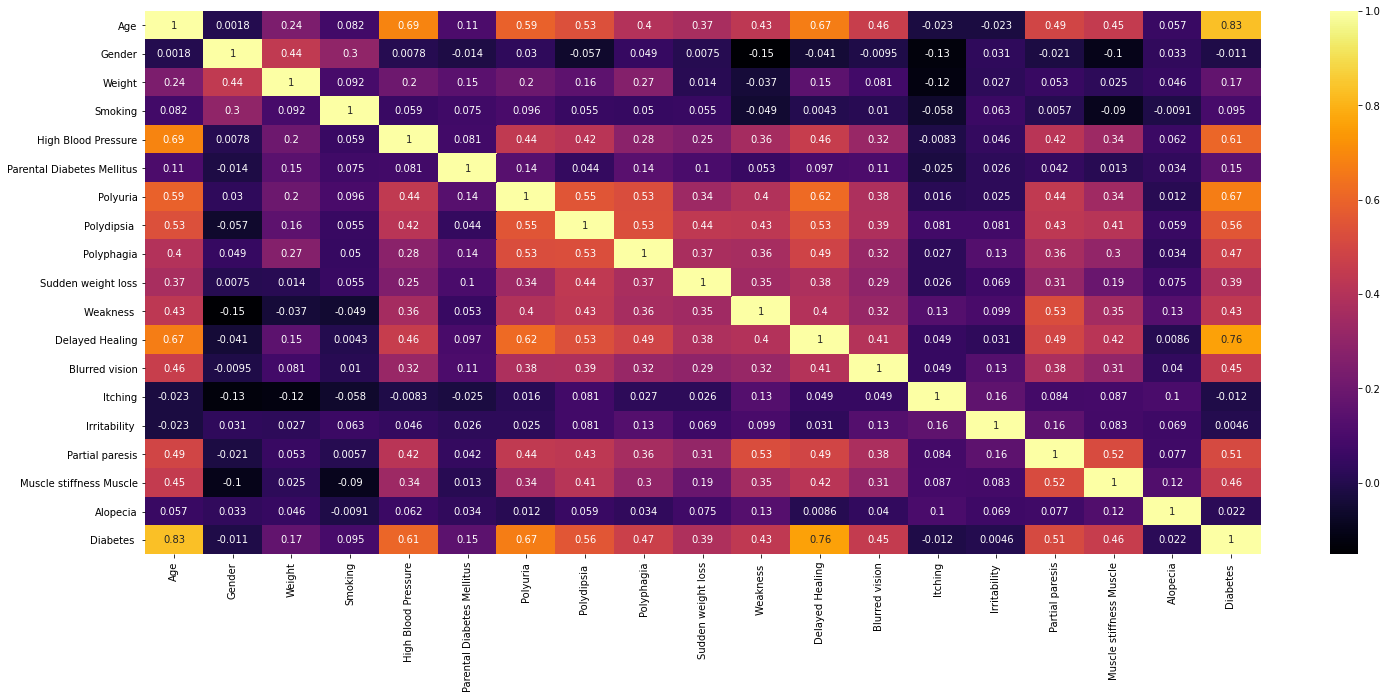

In [ ]:
plt.figure()
plt.figure(figsize = (25,10))
sns.heatmap(data.corr(), cmap = 'inferno', annot = True)

From above we can see that coulumn :


*  **Age** is highly correlated with coulumn **High Blood Pressure**, **Dalayed Healing** and it is also a significant feature in detecting **Diabetes**.
*   **High Blood Pressure** have good correlation coefficient of **0.61** with **Diabetes**.
*   **Polyuria** have good correalation coefficient of **0.62** with **Delayed Healing** and it is also a significant feature for detecting **Diabetes**.
*   **Delayed Healing** is highly correalated with **Diabetes**, with correlation coefficient of **0.76**.







##**t-Test**


In [ ]:
from scipy import stats

for i in columns:
  for j in columns:
    if i == j:
      pass
    else:
      t_test, p_value = stats.ttest_ind(a = data[i], b = data[j], equal_var= False)
      if p_value > 0.05:  
        print("\n")
        print(">>> t-test between {} and {}:".format(i,j))
        print("The t-test value = ",t_test, " and p-value= ", p_value)



>>> t-test between Gender and Weakness :
The t-test value =  0.48888087042850203  and p-value=  0.6250222735252028


>>> t-test between Smoking and Alopecia:
The t-test value =  -0.9050676846987846  and p-value=  0.36562573770950857


>>> t-test between High Blood Pressure and Polyuria:
The t-test value =  -1.4615757965619574  and p-value=  0.14413977525763957


>>> t-test between High Blood Pressure and Delayed Healing:
The t-test value =  -0.44954536025700303  and p-value=  0.6531257544905931


>>> t-test between High Blood Pressure and Diabetes :
The t-test value =  -1.0843117790614965  and p-value=  0.27846132845588084


>>> t-test between Parental Diabetes Mellitus and Irritability :
The t-test value =  -0.4800624035496818  and p-value=  0.6312772659197363


>>> t-test between Parental Diabetes Mellitus and Partial paresis:
The t-test value =  0.8981825755676602  and p-value=  0.3692823032920124


>>> t-test between Polyuria and High Blood Pressure:
The t-test value =  1.4615757

##**Outlier Detection**

In [ ]:
def univariate_outlier_detection(column):

  print("\n\n-----------------------  {n}  ------------------------".format(n = column))

  mean = data[column].mean()
  median = data[column].median()
  mode = data[column].mode()

  print("\nMean:", mean, "\nMedian: ", median,"\nMode: ", mode[0])

  Q1 = data[column].quantile(q = 0.25)
  Q3 = data[column].quantile(q = 0.75)
  IQR = stats.iqr(data[column])

  print("\n\n1st quartile: ", Q1)
  print("3rd quartile: ", Q3)
  print("Inter-quartile Range: ", IQR)

  l_outlier_range = Q1 - 1.5*IQR
  u_outlier_range = Q3 + 1.5*IQR
  print("\n\nLower outlier range: ", l_outlier_range)
  print("Upper outlier range: ", u_outlier_range)

  print("\n\nNumber of outlier in upper range: ", data[data[column] > u_outlier_range][column].count())
  print("Number of outlier in lower range: ", data[data[column] < l_outlier_range][column].count())
  print("\n% of outlier in upper range: ", (data[data[column] > u_outlier_range][column].count()*100/len(data)))
  print("% of outlier in lower range: ", (data[data[column] < l_outlier_range][column].count()*100/len(data)))

  #Boxplot
  print("Boxplot of column " + column)
  plt.figure()
  ax = sns.boxplot(x = data[column])

  plt.show()



-----------------------  Age  ------------------------

Mean: 38.06014362657092 
Median:  29.0 
Mode:  22.0


1st quartile:  22.0
3rd quartile:  55.0
Inter-quartile Range:  33.0


Lower outlier range:  -27.5
Upper outlier range:  104.5


Number of outlier in upper range:  0
Number of outlier in lower range:  0

% of outlier in upper range:  0.0
% of outlier in lower range:  0.0
Boxplot of column Age


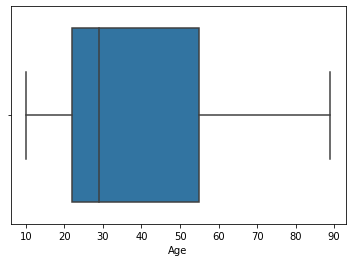



-----------------------  Weight  ------------------------

Mean: 65.51075268817205 
Median:  65.0 
Mode:  70.0


1st quartile:  58.0
3rd quartile:  73.0
Inter-quartile Range:  15.0


Lower outlier range:  35.5
Upper outlier range:  95.5


Number of outlier in upper range:  2
Number of outlier in lower range:  2

% of outlier in upper range:  0.35842293906810035
% of outlier in lower range:  0.35842293906810035
Boxplot of column Weight


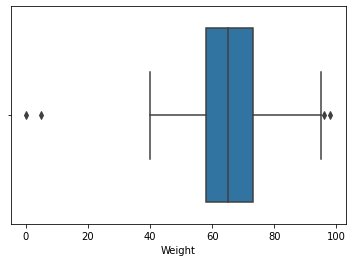

In [ ]:
for i in columns:
  if data[i].dtypes == 'float64':
    univariate_outlier_detection(i)